In [69]:
# notification： this script is modified from https://www.kaggle.com/robinkraft/getting-started-with-the-data-now-with-docs
# most part of this script is the same with it. This is just for data analysis

import sys
import os
import subprocess

from six import string_types

# Make sure you have all of these packages installed, e.g. via pip
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from skimage import io
from scipy import ndimage
from IPython.display import display
import cv2
%matplotlib inline

In [84]:
PLANET_KAGGLE_ROOT = os.path.abspath("./")
PLANET_KAGGLE_JPEG_DIR = os.path.join(PLANET_KAGGLE_ROOT, 'train-jpg')
PLANET_KAGGLE_LABEL_CSV = os.path.join(PLANET_KAGGLE_ROOT, 'train_v2.csv')
assert os.path.exists(PLANET_KAGGLE_ROOT)
assert os.path.exists(PLANET_KAGGLE_JPEG_DIR)
assert os.path.exists(PLANET_KAGGLE_LABEL_CSV)

In [18]:
labels_df = pd.read_csv(PLANET_KAGGLE_LABEL_CSV)
labels_df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [89]:
# Build list with unique labels
label_list = []
for tag_str in labels_df.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)

In [25]:
# Add onehot features for every label
for label in label_list:
    labels_df[label] = labels_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
# Display head
labels_df.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,2697,2670,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2670,37513,11972,27668,7001,3469,7728,4455,209,0,7175,94,683,324,332,340,98
agriculture,672,11972,12315,9150,2712,2737,6034,3377,119,0,2493,24,225,38,32,65,22
clear,0,27668,9150,28431,5502,3090,6295,3527,173,0,0,70,747,307,311,308,85
water,613,7001,2712,5502,7411,915,2125,868,24,0,1295,26,206,299,16,49,3
habitation,129,3469,2737,3090,915,3660,2786,895,41,0,441,36,163,29,4,13,3
road,394,7728,6034,6295,2125,2786,8071,1294,36,0,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,4477,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,209,0,33,0,10,0,2,2,2
cloudy,0,0,0,0,0,0,0,0,0,2089,0,0,0,0,0,0,0


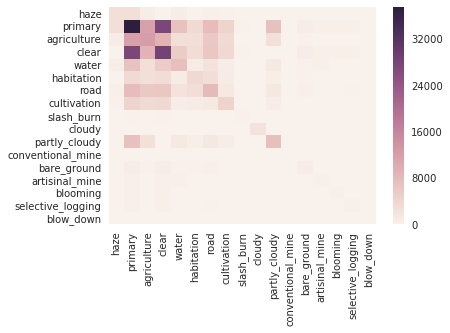

In [30]:
def make_cooccurence_matrix(labels):
    numeric_df = labels_df[labels]; 
    c_matrix = numeric_df.T.dot(numeric_df)
    sns.heatmap(c_matrix)
    return c_matrix
    
# Compute the co-ocurrence matrix
make_cooccurence_matrix(label_list)

,clear,partly_cloudy,haze,cloudy
clear,28431,0,0,0
partly_cloudy,0,7261,0,0
haze,0,0,2697,0
cloudy,0,0,0,2089


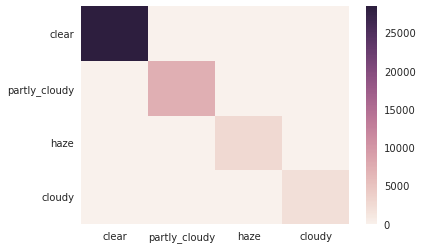

In [31]:
# co-occurence matrix of weather
weather_labels = ['clear', 'partly_cloudy', 'haze', 'cloudy']
make_cooccurence_matrix(weather_labels)

train_24448 water


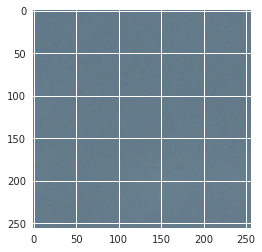

In [98]:
# find the sample without wheater tag
weather_index = labels_df['clear'] + labels_df['cloudy'] + labels_df['haze'] + labels_df['partly_cloudy']

sample_without_wearther_index = weather_index.tolist().index(0)
print labels_df['image_name'][sample_without_wearther_index], labels_df['tags'][sample_without_wearther_index]

img_path = os.path.join(PLANET_KAGGLE_JPEG_DIR, labels_df['image_name'][sample_without_wearther_index]) + '.jpg'
im = cv2.imread(img_path, 1)
plt.imshow(im)

,primary,agriculture,water,habitation,road,cultivation,slash_burn,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
primary,37513,11972,7001,3469,7728,4455,209,94,683,324,332,340,98
agriculture,11972,12315,2712,2737,6034,3377,119,24,225,38,32,65,22
water,7001,2712,7411,915,2125,868,24,26,206,299,16,49,3
habitation,3469,2737,915,3660,2786,895,41,36,163,29,4,13,3
road,7728,6034,2125,2786,8071,1294,36,59,323,110,10,151,2
cultivation,4455,3377,868,895,1294,4477,126,4,89,18,35,58,8
slash_burn,209,119,24,41,36,126,209,0,10,0,2,2,2
conventional_mine,94,24,26,36,59,4,0,100,10,4,0,0,0
bare_ground,683,225,206,163,323,89,10,10,862,40,3,13,4
artisinal_mine,324,38,299,29,110,18,0,4,40,339,0,6,0


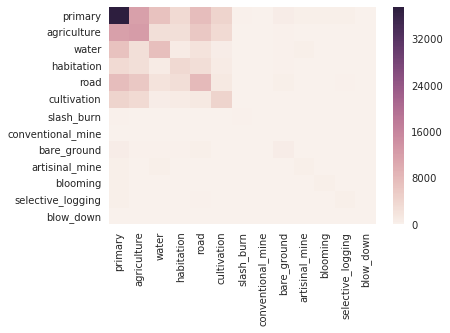

In [101]:
# the co-occurence matrix of land lables
land_labels = ['primary', 'agriculture', 'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming', 'selective_logging', 'blow_down']

make_cooccurence_matrix(land_labels)

,primary,agriculture,water,habitation,road,cultivation
primary,37513,11972,7001,3469,7728,4455
agriculture,11972,12315,2712,2737,6034,3377
water,7001,2712,7411,915,2125,868
habitation,3469,2737,915,3660,2786,895
road,7728,6034,2125,2786,8071,1294
cultivation,4455,3377,868,895,1294,4477


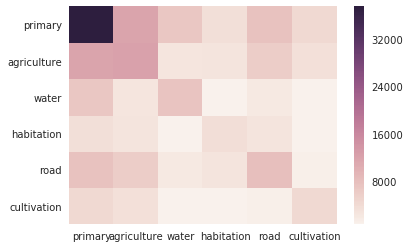

In [99]:
rich_land_labels = [l for l in land_labels if labels_df[land_labels].sum()[l] > 3500]
make_cooccurence_matrix(rich_land_labels)

,slash_burn,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
slash_burn,209,0,10,0,2,2,2
conventional_mine,0,100,10,4,0,0,0
bare_ground,10,10,862,40,3,13,4
artisinal_mine,0,4,40,339,0,6,0
blooming,2,0,3,0,332,7,1
selective_logging,2,0,13,6,7,340,1
blow_down,2,0,4,0,1,1,98


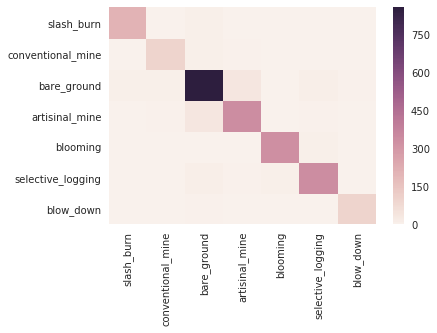

In [97]:
rare_land_labels = [l for l in land_labels if labels_df[land_labels].sum()[l] < 3500]
make_cooccurence_matrix(rare_land_labels)